In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np

time: 324 ms (started: 2022-11-19 10:56:18 -08:00)


In [Contrastive learning unifies t-SNE and UMAP](https://arxiv.org/abs/2206.01816) Damrich and co-workers describe UMAP in terms of a contrastive learning cost function. In their paper, they describe a generalized method they call neg-t-SNE.

In [5]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("negumap"),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
)

time: 2.89 ms (started: 2022-11-19 11:11:03 -08:00)


[10:56:30] INFO     Loading faiss with AVX2 support.                                                   ]8;id=523922;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=545949;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#54\54]8;;\

           INFO     Could not load library with AVX2 support due to:                                   ]8;id=529377;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=674479;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#58\58]8;;\
                    ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")                                  

           INFO     Loading faiss.                                                                     ]8;id=325254;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=251374;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#64\64]8;;\

           INFO     Successfully loaded faiss.                                                         ]8;id=202454;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=169393;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#66\66]8;;\

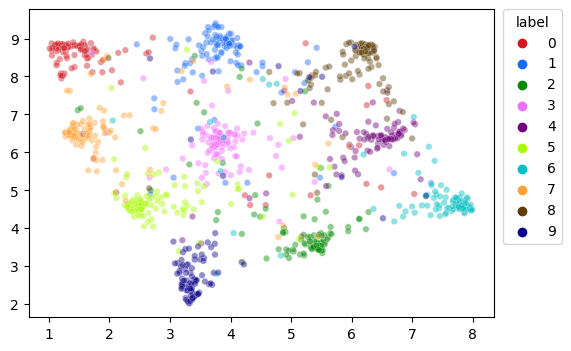

time: 6.58 s (started: 2022-11-19 10:56:25 -08:00)


In [3]:
embed_result = embed_pipeline.run("s1k")

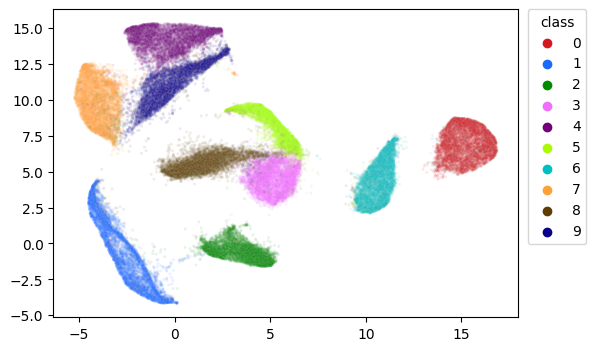

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=0.6160342857142859, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.3552582415212993, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=0.09502857142857142, info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=0.1543908571428572, info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=0.23790552380952384, info={'metric': 'euclidean', 'n_neighbors': 150})]

time: 30.4 s (started: 2022-11-19 10:56:32 -08:00)


In [4]:
embed_pipeline.run("mnist")["evaluations"]